<a href="https://colab.research.google.com/github/hystereo/canceranalysis/blob/main/CancerAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importowanie niezbędnych bibliotek

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, \
  ConfusionMatrixDisplay, classification_report, RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
sns.set()

Wczytanie danych i zapoznanie się z nimi

In [ ]:
df = pd.read_csv("dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   int64 
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   int64 
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   int64 
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  CHEST_PAIN             3000 non-null   int64 
 15  LUNG_CANCER          

Wyświetlenie liczby unikalnych wartości w każdej kolumnie

In [ ]:
df.nunique()

GENDER                    2
AGE                      51
SMOKING                   2
YELLOW_FINGERS            2
ANXIETY                   2
PEER_PRESSURE             2
CHRONIC_DISEASE           2
FATIGUE                   2
ALLERGY                   2
WHEEZING                  2
ALCOHOL_CONSUMING         2
COUGHING                  2
SHORTNESS_OF_BREATH       2
SWALLOWING_DIFFICULTY     2
CHEST_PAIN                2
LUNG_CANCER               2
dtype: int64

Mapowanie wartości kolumn 'GENDER' i 'LUNG_CANCER' na wartości liczbowe

In [ ]:
df['GENDER'] = df['GENDER'].map({'M': 0, 'F': 1})
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'YES': 1, 'NO': 0})
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,0,65,1,1,1,2,2,1,2,2,2,2,2,2,1,0
1,1,55,1,2,2,1,1,2,2,2,1,1,1,2,2,0
2,1,78,2,2,1,1,1,2,1,2,1,1,2,1,1,1
3,0,60,2,1,1,1,2,1,2,1,1,2,1,2,2,1
4,1,80,1,1,2,1,1,2,1,2,1,1,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,71,2,1,1,2,2,1,1,1,1,2,1,1,2,0
2996,1,75,1,2,1,1,1,2,2,2,2,1,1,2,1,0
2997,1,62,2,2,2,1,2,2,2,2,1,1,2,2,2,1
2998,0,30,1,1,2,2,2,2,2,2,2,1,2,1,2,1


Sprawdzenie brakujących wartości w danych

In [ ]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

Wyświetlenie podstawowych statystyk opisowych

In [ ]:
df.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.495333,55.169000,1.491000,1.514000,1.494000,1.499000,1.509667,1.489667,1.506667,1.497333,1.491333,1.510667,1.488000,1.489667,1.498667,0.506000
std,0.500062,14.723746,0.500002,0.499887,0.500047,0.500082,0.499990,0.499977,0.500039,0.500076,0.500008,0.499970,0.499939,0.499977,0.500082,0.500047
min,0.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,42.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,0.000000,55.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,68.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,1.000000,80.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


Wizualizacja liczby osób z rakiem płuc

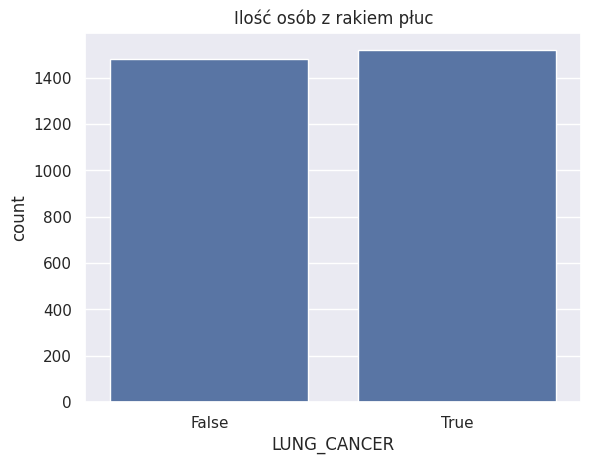

In [ ]:
sns.countplot(x='LUNG_CANCER', data=df)
plt.title('Ilość osób z rakiem płuc')
plt.xticks([0,1],['False','True'])
plt.show()

Mapowanie wszystkich kolumn poza 'GENDER' i 'LUNG_CANCER' na wartości binarne

In [ ]:
columns = ['SMOKING','YELLOW_FINGERS','ANXIETY','PEER_PRESSURE','CHRONIC_DISEASE','FATIGUE','ALLERGY','WHEEZING','ALCOHOL_CONSUMING',
           'COUGHING','SHORTNESS_OF_BREATH','SWALLOWING_DIFFICULTY','CHEST_PAIN']
for column in columns:
  df[column] = df[column].map({1: 0, 2: 1})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 3000 non-null   int64
 1   AGE                    3000 non-null   int64
 2   SMOKING                3000 non-null   int64
 3   YELLOW_FINGERS         3000 non-null   int64
 4   ANXIETY                3000 non-null   int64
 5   PEER_PRESSURE          3000 non-null   int64
 6   CHRONIC_DISEASE        3000 non-null   int64
 7   FATIGUE                3000 non-null   int64
 8   ALLERGY                3000 non-null   int64
 9   WHEEZING               3000 non-null   int64
 10  ALCOHOL_CONSUMING      3000 non-null   int64
 11  COUGHING               3000 non-null   int64
 12  SHORTNESS_OF_BREATH    3000 non-null   int64
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64
 14  CHEST_PAIN             3000 non-null   int64
 15  LUNG_CANCER            3000 non-null  

Wizualizacja macierzy korelacji

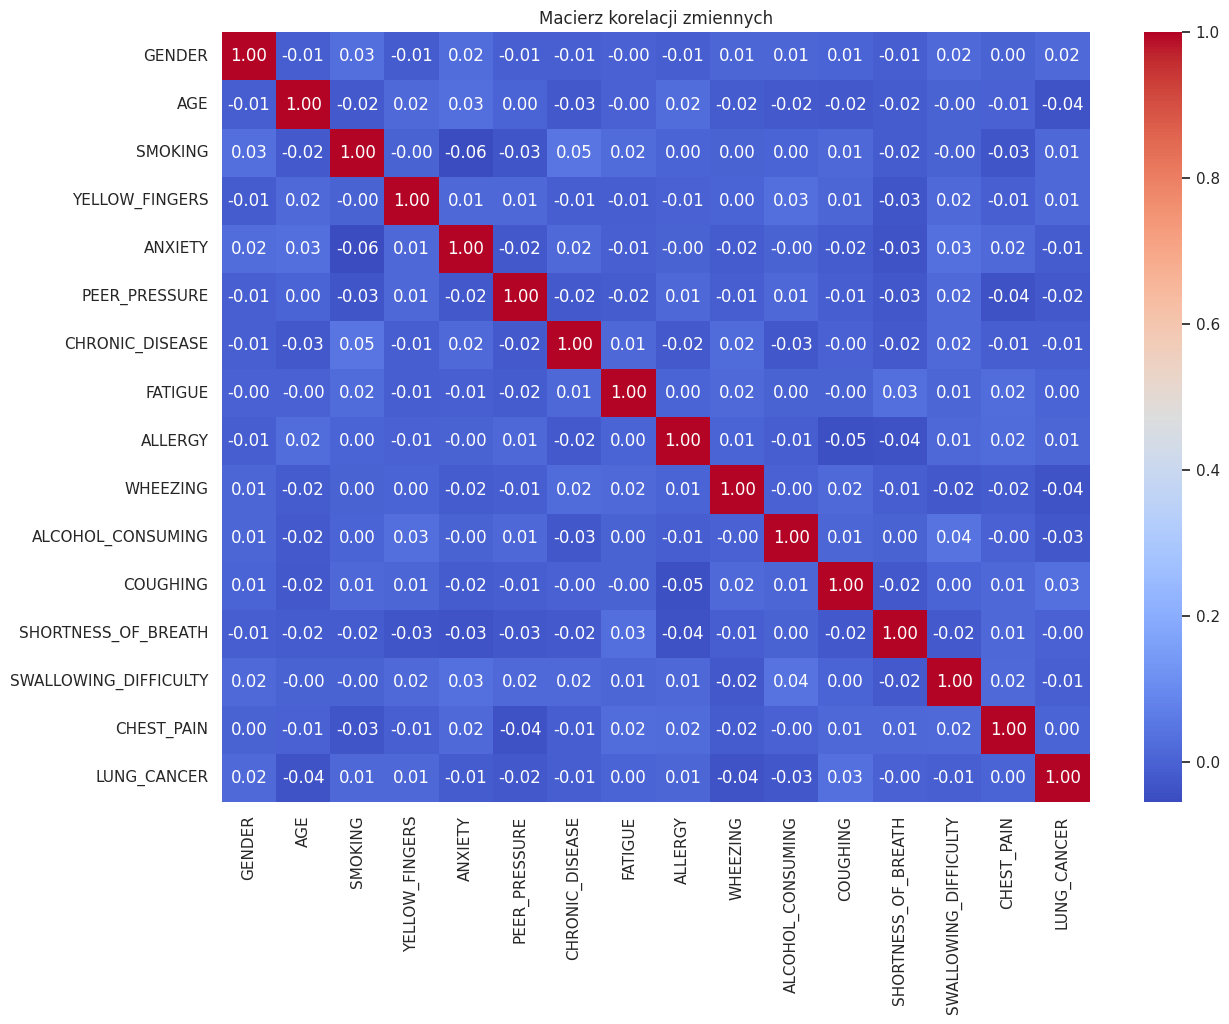

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(14,10))
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Macierz korelacji zmiennych')
plt.show()

Podział danych na kobiety i mężczyzn, aby oddzielnie przedstawić wizualizacje: wszystkich osób z rakiem, samych mężczyzn i samych kobiet

In [ ]:
df_men = df[df['GENDER'] == 0]
df_women = df[df['GENDER'] == 1]

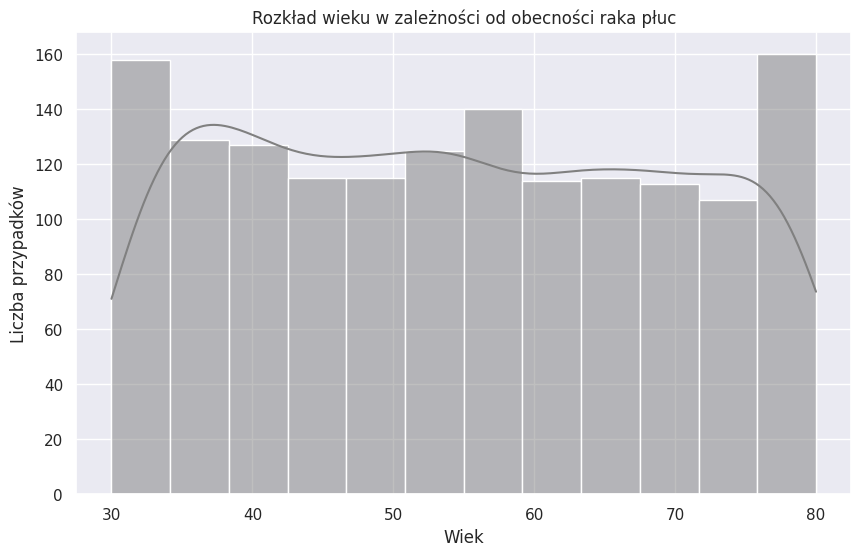

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['LUNG_CANCER'] == 1], x='AGE', color = 'gray',multiple='stack',kde=True)
plt.title('Rozkład wieku w zależności od obecności raka płuc')
plt.xlabel('Wiek')
plt.ylabel('Liczba przypadków')
plt.show()

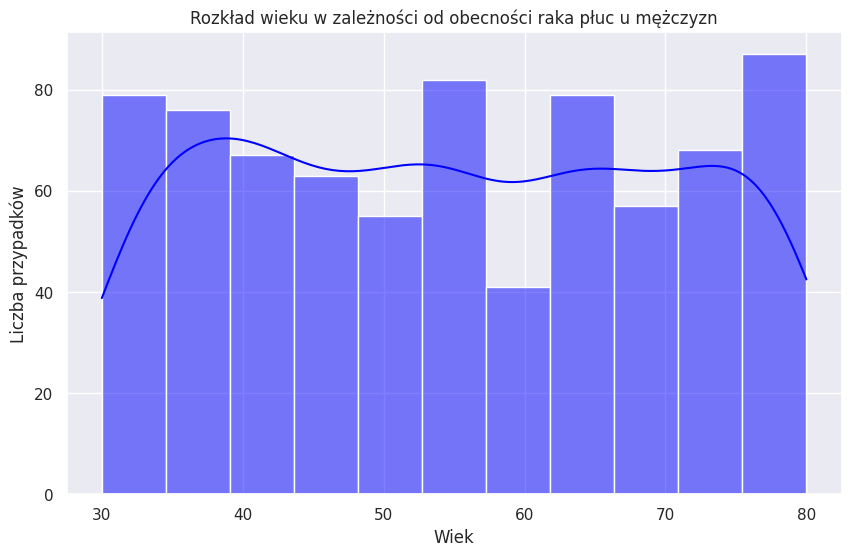

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df_men[df_men['LUNG_CANCER'] == 1], x='AGE', color = 'blue',multiple='stack',kde=True)
plt.title('Rozkład wieku w zależności od obecności raka płuc u mężczyzn')
plt.xlabel('Wiek')
plt.ylabel('Liczba przypadków')
plt.show()

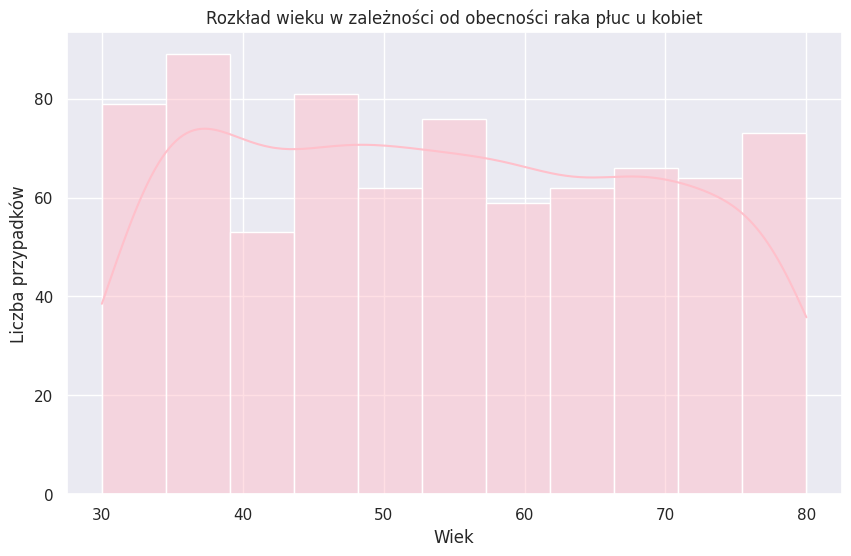

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df_women[df_women['LUNG_CANCER'] == 1], x='AGE', color ='pink',multiple='stack',kde=True)
plt.title('Rozkład wieku w zależności od obecności raka płuc u kobiet')
plt.xlabel('Wiek')
plt.ylabel('Liczba przypadków')
plt.show()

Definiowanie zmiennych X i y, potrzebnych do podziału danych na zestaw treningowy i testowy

In [ ]:
y = df['LUNG_CANCER']

In [ ]:
df_copy = df.copy()
df_copy = df_copy.drop('LUNG_CANCER', axis = 1)

In [ ]:
X = df_copy.values
X

array([[ 0, 65,  0, ...,  1,  1,  0],
       [ 1, 55,  0, ...,  0,  1,  1],
       [ 1, 78,  1, ...,  1,  0,  0],
       ...,
       [ 1, 62,  1, ...,  1,  1,  1],
       [ 0, 30,  0, ...,  1,  0,  1],
       [ 0, 40,  0, ...,  0,  0,  0]])

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Train size: ', X_train.shape[0])
print('Test size: ', X_test.shape[0])

Train size:  2400
Test size:  600


In [ ]:
X.shape

(3000, 15)

In [ ]:
y.shape

(3000,)

In [ ]:
X[:, :4]

array([[-0.99070982,  0.66780823, -0.98215912, -1.02840321],
       [ 1.0093773 , -0.01147997, -0.98215912,  0.97238125],
       [ 1.0093773 ,  1.5508829 ,  1.01816496,  0.97238125],
       ...,
       [ 1.0093773 ,  0.46402177,  1.01816496,  0.97238125],
       [-0.99070982, -1.70970048, -0.98215912, -1.02840321],
       [-0.99070982, -1.03041227, -0.98215912,  0.97238125]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2400, 15), (600, 15), (2400,), (600,))

Balansowanie danych za pomocą SMOTE (Synthetic Minority Over-sampling Technique)

In [ ]:
smote = SMOTE()
X_res, y_res = smote.fit_resample(X, y)

Tworzenie, trenowanie i walidacja krzyżowa modelu regresji logistycznej

In [ ]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

log_reg_scores = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression:')
print(f'Cross-Validation Accuracy: {log_reg_scores.mean()} ± {log_reg_scores.std()}')

y_pred_log_reg = log_reg.predict(X_test)

print(classification_report(y_test, y_pred_log_reg))
print(f'Accuracy: {accuracy_score(y_test, y_pred_log_reg)}')

===Logistic Regression===
Cross-Validation Accuracy: 0.4966666666666667 ± 0.017260262647673306
              precision    recall  f1-score   support

           0       0.47      0.41      0.44       296
           1       0.49      0.55      0.52       304

    accuracy                           0.48       600
   macro avg       0.48      0.48      0.48       600
weighted avg       0.48      0.48      0.48       600

Accuracy: 0.48


Tworzenie i walidacja krzyżowa modelu lasu losowego

In [ ]:
rand_forest = RandomForestClassifier(random_state=42)

rand_forest_scores = cross_val_score(rand_forest, X_train, y_train, cv=5)

print('Random Forest:')
print(f'Cross-Validation Accuracy: {rand_forest_scores.mean()} ± {rand_forest_scores.std()}')

===Random Forest===
Cross-Validation Accuracy: 0.5025 ± 0.010736748938937586


Tworzenie i walidacja krzyżowa modelu LightGBM

In [ ]:
lgbm = LGBMClassifier(random_state=42)

lgbm_scores = cross_val_score(lgbm,X_train,y_train,cv=5)
print('LightGBM:')
print(f'Cross-Validation Accuracy: {lgbm_scores.mean()} ± {lgbm_scores.std()}')

[LightGBM] [Info] Number of positive: 972, number of negative: 948
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000551 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 1920, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506250 -> initscore=0.025001
[LightGBM] [Info] Start training from score 0.025001
[LightGBM] [Info] Number of positive: 971, number of negative: 949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 1920, number of used features: 15
[LightGBM] [Info] [binary:BoostFro

Tworzenie i trenowanie modelu perceptronu

In [ ]:
ppn = Perceptron()
ppn.fit(X_train, y_train)

Perceptron()

Predykcje na zbiorze treningowym i testowym

In [ ]:
y_pred_train = ppn.predict(X_train)
y_pred_test = ppn.predict(X_test)

In [ ]:
accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)

(0.49375, 0.515)

In [ ]:
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)
cm_train, cm_test

(array([[525, 661],
        [554, 660]]),
 array([[124, 172],
        [119, 185]]))

Wizualizacja macierzy konfuzji dla zbioru treningowego

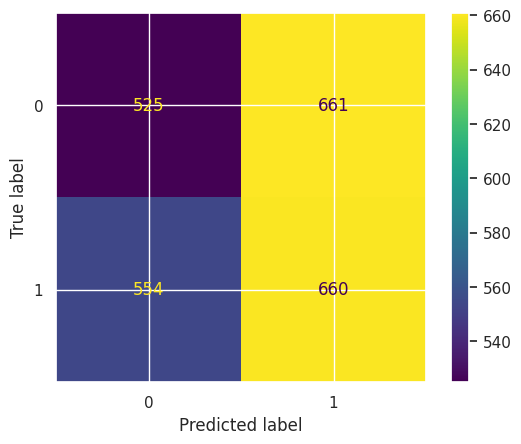

In [ ]:
ConfusionMatrixDisplay(cm_train).plot()

Wizualizacja macierzy konfuzji dla zbioru testowego

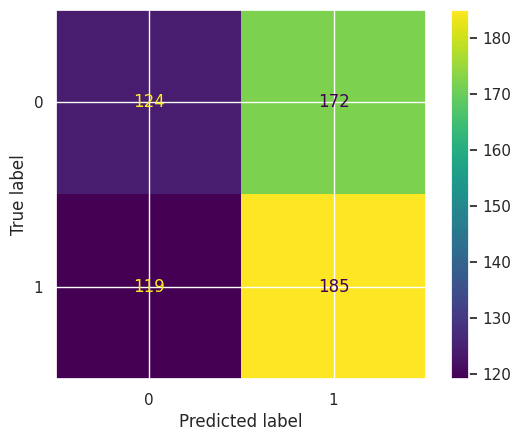

In [ ]:
ConfusionMatrixDisplay(cm_test).plot()

In [ ]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.49      0.44      0.46      1186
           1       0.50      0.54      0.52      1214

    accuracy                           0.49      2400
   macro avg       0.49      0.49      0.49      2400
weighted avg       0.49      0.49      0.49      2400



In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.51      0.42      0.46       296
           1       0.52      0.61      0.56       304

    accuracy                           0.52       600
   macro avg       0.51      0.51      0.51       600
weighted avg       0.51      0.52      0.51       600



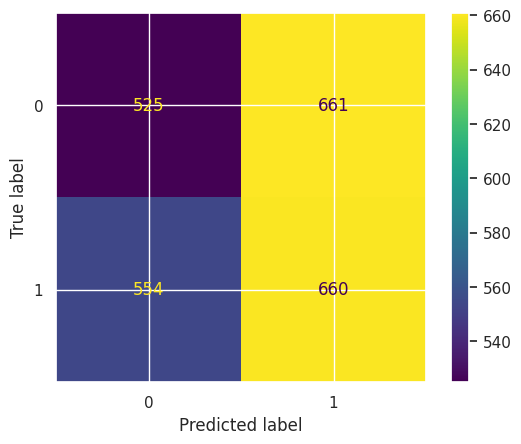

In [ ]:
ConfusionMatrixDisplay.from_estimator(ppn, X_train, y_train)

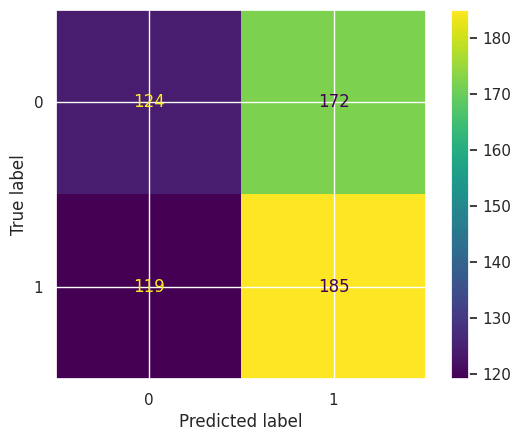

In [ ]:
ConfusionMatrixDisplay.from_estimator(ppn, X_test, y_test)

Wizualizacja krzywej ROC dla perceptronu

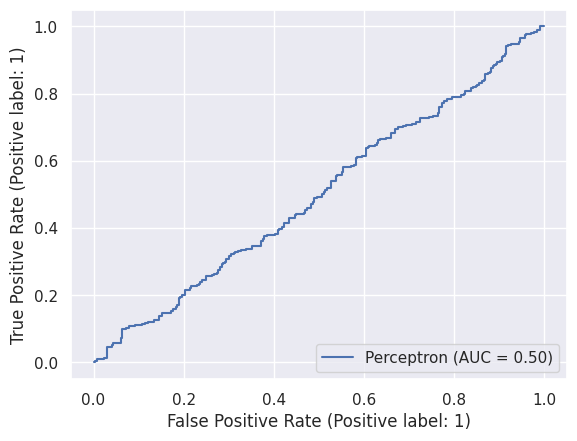

In [ ]:
RocCurveDisplay.from_estimator(ppn, X_test, y_test)

In [ ]:
X[y != 1, :].shape

(1482, 15)